In [1]:
import os
base_path = os.path.join("..", "Datasets")
images = os.path.join(base_path, 'images')
annotations = os.path.join(base_path, '_annotations.csv')

In [ ]:
# loading anotasi

rows= open(annotations).read().strip().split("\n")

data=[]
targets=[]
filenames=[]

In [ ]:
# split dataset
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

for row in rows:
  row=row.split(",")
  (filename,startX,startY,endX,endY)=row

  imagepaths=os.path.sep.join([images,filename])
  image=cv2.imread(imagepaths)
  (h,w)=image.shape[:2]

  # inisialisasi starting point
  startX = float(startX) / w
  startY = float(startY) / h
  # inisialisasi ending point
  endX = float(endX) / w
  endY = float(endY) / h
  # load gambar, resize ke 224x224
  image=load_img(imagepaths,target_size=(224,224))
  image=img_to_array(image)

  targets.append((startX,startY,endX,endY))
  filenames.append(filename)
  data.append(image)


In [4]:
# Normalizing Data here also we face would face issues if we take input as integer
import numpy as np
data=np.array(data,dtype='float32') / 255.0
targets=np.array(targets,dtype='float32')

In [6]:
# we should seperate data into train and split so import sklearn library
from sklearn.model_selection import train_test_split

In [7]:
# split into testing and training
split=train_test_split(data,targets,filenames,test_size=0.10,random_state=42)

In [8]:
# lets split into steps
(train_images,test_images) = split[:2]
(train_targets,test_targets) = split[2:4]
(train_filenames,test_filenames) = split[4:]


In [10]:
# lets import pre trained VGG16 Which is already Builtin for computer vision
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

In [11]:
# Imagenet is a competition every year held and VGG16 is winner of between  2013-14
# so here we just want limited layers so thats why we false included_top
vgg=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [12]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.layers import Input,Flatten,Dense

In [14]:
# we use VGG16 as per our requirement not use whole
vgg.trainable = False

flatten = vgg.output

flatten = Flatten()(flatten)

In [15]:
# Lets make bboxhead
bboxhead = Dense(128,activation="relu")(flatten)
bboxhead = Dense(64,activation="relu")(bboxhead)
bboxhead = Dense(32,activation="relu")(bboxhead)
bboxhead = Dense(4,activation="relu")(bboxhead)

In [16]:
# lets import Model
from tensorflow.keras.models import Model
model = Model(inputs = vgg.input,outputs = bboxhead)

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,936,548 (68.42 MB)

 Trainable params: 3,221,860 (12.29 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# Lets fit our model
# Optimization
from tensorflow.keras.optimizers import Adam

opt = Adam(1e-4)

In [19]:
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer=opt, loss=MeanSquaredError())

In [20]:
history = model.fit(train_images,train_targets,validation_data=(test_images,test_targets),batch_size=32,epochs=50,verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - loss: 0.0743 - val_loss: 0.0600
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - loss: 0.0566 - val_loss: 0.0587
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 809s 2s/step - loss: 0.0552 - val_loss: 0.0587
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - loss: 0.0556 - val_loss: 0.0588
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - loss: 0.0542 - val_loss: 0.0583
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1716s 4s/step - loss: 0.0534 - val_loss: 0.0589
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 756s 2s/step - loss: 0.0537 - val_loss: 0.0606
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 753s 2s/step - loss: 0.0533 - val_loss: 0.0587
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - loss: 0.0539 - val_loss: 0.0590
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - loss: 0.0522 - val_loss: 0.0585
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - loss: 0.0527 - val_loss: 0.0612
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━

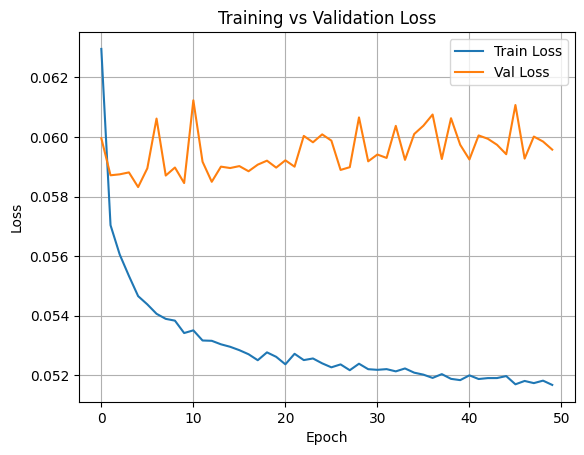

In [116]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()

In [21]:
# lets save model
model.save(os.path.join(base_path, 'detect_Plastic.h5'))

In [22]:
from tensorflow.keras.models import load_model

model = load_model(os.path.join(base_path, 'detect_Plastic.h5'))

In [23]:
model=load_model(os.path.join(base_path, 'detect_Plastic.h5'))

In [129]:
imagepath = os.path.join("..", "Datasets", "images", "plastic-12-_jpg.rf.3b58a8ec37f1817b91ed056b4bf7a0ef.jpg")

In [130]:
image = load_img(imagepath,
                 target_size=(224,224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image,axis=0)

In [131]:
preds=model.predict(image)[0]
(startX,startY,endX,endY)=preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


In [132]:
import imutils

In [133]:
image=cv2.imread(imagepaths)
image=imutils.resize(image,width=600)

In [134]:
(h,w)=image.shape[:2]

In [135]:
startX=int(startX * w)
startY=int(startY * h)

endX=int(endX * w)
endY=int(endY * h)

In [136]:
cv2.rectangle(image,(startX,startY),(endX,endY),(0,255,0),3)

array([[[0, 0, 7],
        [0, 0, 4],
        [4, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 7],
        [0, 0, 4],
        [3, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 7],
        [0, 0, 4],
        [3, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

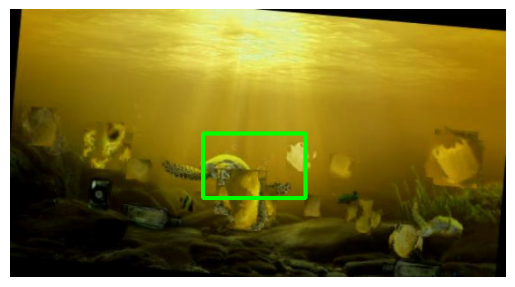

In [137]:
import cv2
from matplotlib import pyplot as plt

plt.imshow(image)
plt.axis('off')  # Sembunyikan axis
plt.show()

In [138]:
import pandas as pd

gt_path = os.path.join(base_path, '_annotations.csv')
gt_df = pd.read_csv(gt_path)

gt_filtered = gt_df[gt_df.iloc[:, 0] == imagepath]

gt_boxes = gt_filtered.iloc[:, 1:5].values.tolist()
gt_boxes

pred_boxes = [[startX, startY, endX, endY]]

# Fungsi menghitung IoU
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    if interArea == 0:
        return 0.0

    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Evaluasi
TP, FP, FN = 0, 0, 0
iou_threshold = 0.5
matched = []

for pred_box in pred_boxes:
    found_match = False
    for i, gt_box in enumerate(gt_boxes):
        iou = compute_iou(pred_box, gt_box)


print(f"{iou:.2f}")


0.44
